In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn 
import os
import sys
import time

from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [3]:
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [5]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)



In [ ]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()

show_single_image(x_train[0])

In [ ]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row +col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_name = ['T-shirt','Trouser','p','d','c','s','shirt','sneaker','b','a']


In [ ]:
show_imgs(3,5,x_train,y_train,class_name)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='selu'))
  #  model.add(keras.layers.BatchNormalization())
model.add(keras.layers.AlphaDropout(rate=0.5))
# model.add(keras.layers.Dense(300,activation = 'relu'))
# model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))



model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])


In [ ]:
model.layers

In [ ]:
model.summary()

In [7]:
logdir = './dnn_selu_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_minist_model.h5")

callbacks =[
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]
history = model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid),callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 233us/sample - loss: 0.6787 - accuracy: 0.7717 - val_loss: 0.6049 - val_accuracy: 0.8430
Epoch 2/10
55000/55000 [==============================] - 10s 188us/sample - loss: 0.4544 - accuracy: 0.8442 - val_loss: 0.5681 - val_accuracy: 0.8602
Epoch 3/10
55000/55000 [==============================] - 10s 184us/sample - loss: 0.4044 - accuracy: 0.8597 - val_loss: 0.5710 - val_accuracy: 0.8652
Epoch 4/10
55000/55000 [==============================] - 10s 183us/sample - loss: 0.3697 - accuracy: 0.8711 - val_loss: 0.5730 - val_accuracy: 0.8670
Epoch 5/10
55000/55000 [==============================] - 10s 186us/sample - loss: 0.3502 - accuracy: 0.8757 - val_loss: 0.5122 - val_accuracy: 0.8692
Epoch 6/10
55000/55000 [==============================] - 10s 181us/sample - loss: 0.3323 - accuracy: 0.8792 - val_loss: 0.4944 - val_accuracy: 0.8840
Epoch 7/10
55000/55000 [=====================

In [ ]:
type(history)

In [ ]:
history.history

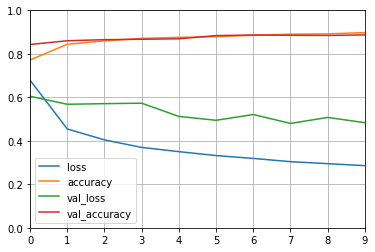

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled,y_test)